In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/diabetes.csv")

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.shape

(768, 9)

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Taking the Age and EstimatedSalary as the input features and Purchased will our output column

In [ ]:
X = data.iloc[:,0:-1]

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y = data['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
# train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.75, random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [ ]:
# applying the standard scaler
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
X_train_sc

array([[ 1.50755225, -1.01521454, -0.40451932, ..., -1.22070104,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.09964691, -0.61509602, ...,  0.13719053,
        -0.62493647, -0.88246592],
       [-1.12204091, -0.95207195,  0.54307587, ...,  0.0240329 ,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.85735805, -0.24658679, ..., -0.9440935 ,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.14149973,  0.2272108 , ..., -0.26514771,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46863645,  0.64836422, ..., -4.04964181,
         0.51627505,  2.953134  ]])

In [ ]:
X_test_sc

array([[-0.82986389,  2.4576282 ,  0.33249916, ...,  1.34420526,
         2.78665365, -0.96584853],
       [-0.53768687, -0.44693118,  0.2272108 , ...,  0.17490974,
        -0.19434743, -0.88246592],
       [ 0.04666716, -1.42564141, -0.40451932, ...,  0.22520202,
        -0.23349189, -0.71570071],
       ...,
       [-0.82986389, -0.38378859, -0.50980767, ..., -0.85608201,
         1.4406865 , -1.04923114],
       [-0.24550986,  0.21606607,  0.43778751, ..., -1.39672402,
        -0.60385869,  1.7857775 ],
       [ 0.33884418, -1.04678584,  0.43778751, ..., -0.57947447,
        -0.63396981,  0.28489057]])

In [ ]:
# applying the decision tree classfier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model1 = DecisionTreeClassifier()

In [ ]:
model1.fit(X_train_sc, y_train)

DecisionTreeClassifier()

In [ ]:
# now my model has learnt everything from the train dataset

In [ ]:
y_pred = model1.predict(X_test_sc)

In [ ]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.value_counts()

0    127
1     65
dtype: int64

In [ ]:
y_test_df = pd.DataFrame(y_test)
y_test_df.value_counts()

Outcome
0          130
1           62
dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[102,  28],
       [ 25,  37]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       130
           1       0.57      0.60      0.58        62

    accuracy                           0.72       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.73      0.72      0.73       192



In [ ]:
# Plotting the tree 

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

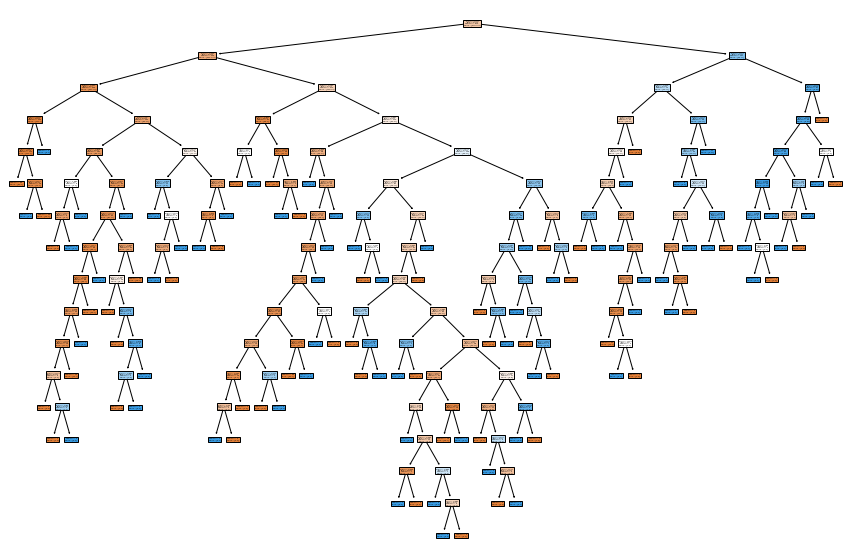

In [ ]:
plt.figure(figsize = (15,10))
tree.plot_tree(model1, filled = True)
plt.show()

# lets play with decision tree

In [ ]:
model2 = DecisionTreeClassifier(max_depth = 2)

In [ ]:
model2.fit(X_train_sc, y_train)

DecisionTreeClassifier(max_depth=2)

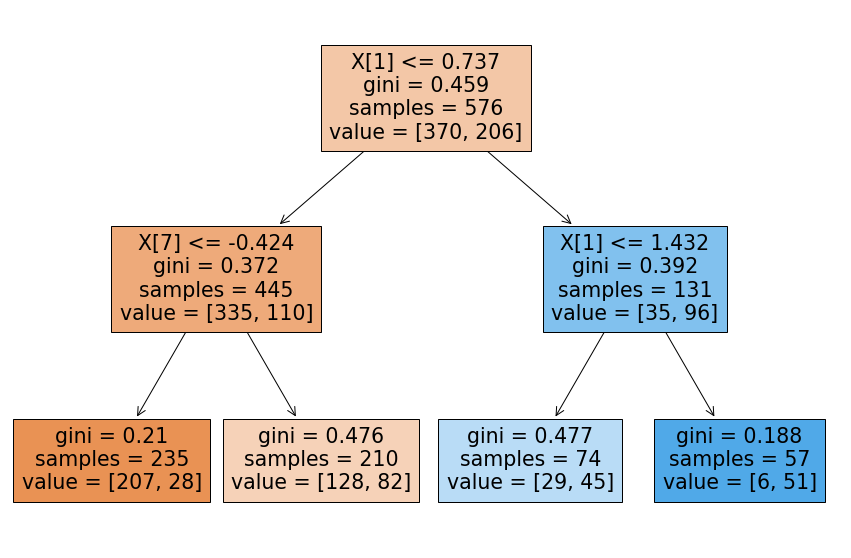

In [ ]:
plt.figure(figsize = (15,10))
tree.plot_tree(model2, filled = True)
plt.show()